In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

Load the data

In [2]:
data = genfromtxt('happiness_vs_time_with_loved_ones.csv', delimiter=',', skip_header=1)
X = data[:, 0]
y = data[:, 1]

Construct design matrix Φ = [X, 1]

In [3]:
Φ = np.vstack([X, np.ones_like(X)]).T

Closed-form solution: w_closed = (ΦᵀΦ)⁻¹Φᵀy

In [4]:
w_closed = np.linalg.inv(Φ.T @ Φ) @ Φ.T @ y
y_closed = Φ @ w_closed

Gradient Descent Settings

In [5]:
w_gd = np.zeros(2)
α = 0.001     # Learning rate
epochs = 10000

Gradient Descent Optimization

In [6]:
for _ in range(epochs):
    gradient = 2 * Φ.T @ (Φ @ w_gd - y) / len(y)
    w_gd -= α * gradient

In [7]:
y_gd = Φ @ w_gd

Plot both solutions

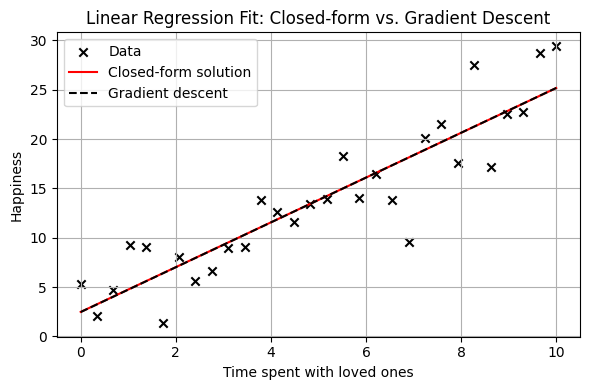

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='black', marker='x', label='Data')
plt.plot(X, y_closed, color='red', label='Closed-form solution')
plt.plot(X, y_gd, linestyle='--', color='black', label='Gradient descent')
plt.xlabel("Time spent with loved ones")
plt.ylabel("Happiness")
plt.title("Linear Regression Fit: Closed-form vs. Gradient Descent")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Print weights

In [9]:
print(f"Closed-form solution: Slope = {w_closed[0]:.4f}, Intercept = {w_closed[1]:.4f}")
print(f"Gradient descent:      Slope = {w_gd[0]:.4f}, Intercept = {w_gd[1]:.4f}")

Closed-form solution: Slope = 2.2682, Intercept = 2.4875
Gradient descent:      Slope = 2.2700, Intercept = 2.4752
